# 0 - Préparation de l'environnement de travail

Préparation de l'environnement de travail

Q1) Depuis votre Google Drive,

a) créez un dossier "tp_IA" dans lequel vous allez stocker les solutions de tous les TP

b) dans le dossier "tp_IA", créez un dossier TP1

c) créez un notebook GoogleColab, nommé tp1_IA dans le dossier TP1
              
2) Les données utilisées à l'intérieur de GoogleColab sont supprimées automatiquement après la fin de la session. Pour remédier à ceci, il est recommandé de stocker ces données sur GoogleDrive et d'y accéder via GooglColab.
Installez GoogleDrive dans votre environnement d'exécution :
from google.colab import drive
drive.mount("/content/drive/")  

Remarque :
vous allez remarquer que mon notebook est en dark mode, si vous voulez l'activer cliquez sur Tools > Settings >  Site > Theme > dark


In [29]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


 # I - Préparation de données

Q3) Créez une section intitulée I- Préparation de données


###  0 - Téléchargement de données


Q4)

a) Téléchargez housing.csv. Ensuite, déplacez-le dans le dossier TP1 dans GoogleCloud.
C'est une base de données permettant d'effectuer la régression pour prédire les prix des maisons (= output = valeur cible) dans l'État de la Californie à partir de plusieurs caractéristiques (=input). Il s'agit des données issues d'un recensement de 1990 aux États-Unis. La référence de ces données est :
Pace, R. Kelley et Ronald Barry, "Sparse Spatial Autoregressions", Statistics and Probability Letters, Volume 33, Numéro 3, 5 mai 1997, p. 291-297.

b) Vérifiez si la base de données existe aussi sur GoogleCollab (dans le dossier "gdrive")


###1 - Informations sur les données

Q5) Créez un titre intitulé 1- Informations sur les données (il va être automatiquement inséré comme sous-section de la section I)

Q6) Créez et exécutez, via le signe de play, le code ci-dessous qui permet de localiser le chemin du travail

In [30]:
import os
print(os.getcwd())

/content


Q7) a) Importez la bibliothèque pandas en utilisant le code suivant :

In [31]:
import pandas as pd

b) Utilisez le code suivant qui lit le fichier "housing.csv" et stocke son contenu dans une variable (de type DataFrame) en utilisant la fonction "read_csv" de la bibliothèque pandas :

In [32]:
housing = pd.read_csv("/content/drive/MyDrive/tp_IA/TP1/housing.csv") #housing = pd.read_csv("housing.csv")
print(type(housing))

<class 'pandas.core.frame.DataFrame'>


c)  Affichez les longitudes de cette base de données en utilisant le code suivant :

In [33]:
print(housing["longitude"])

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64


d) Affichez les 5 premières lignes de "housing.csv" en utilisant la fonction "head" de la bibliothèque pandas

In [34]:
print(housing.head(n=5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


e) Sachant que la valeur cible à prédire est  "median_house_value", il s'agit d'un problème de classification ou de régression ?

C'est un problème de regression

Q8) a) Créez un code qui affiche le nombre de lignes et de colonnes des données, le type des attributs et le nombre de valeurs non nulles. Pour ce faire, utilisez la fonction "info" de la bibliothèque pandas.

In [35]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


b) Qu'est ce que vous remarquez à propos de l'attribut "total_bedrooms" par rapport aux autres attributs ?

Certaines maison n'ont pas de chambre il semblerait

c) Qu'est ce que vous remarquez à propos de l'attribut "ocean_proximity" par rapport aux autres attributs ?

C'est un objet et non un flottant

Q9) Créez un code qui affiche l'occurrence des valeurs utilisées dans l'attribut "ocean_proximity" en utilisant la fonction "value_counts" de la bibliothèque pandas


In [36]:
print(housing.value_counts(subset='ocean_proximity'))

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


Q10) Créez un code qui affiche des statistiques sur les features et la valeur cible. Pour ce faire, utilisez la fonction "describe()" de la bibliothèque pandas

In [37]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

Q11) Utilisez le code suivant pour afficher les histogrammes des différents features (datahousing est la variable qui contient les données de "housing.csv"):


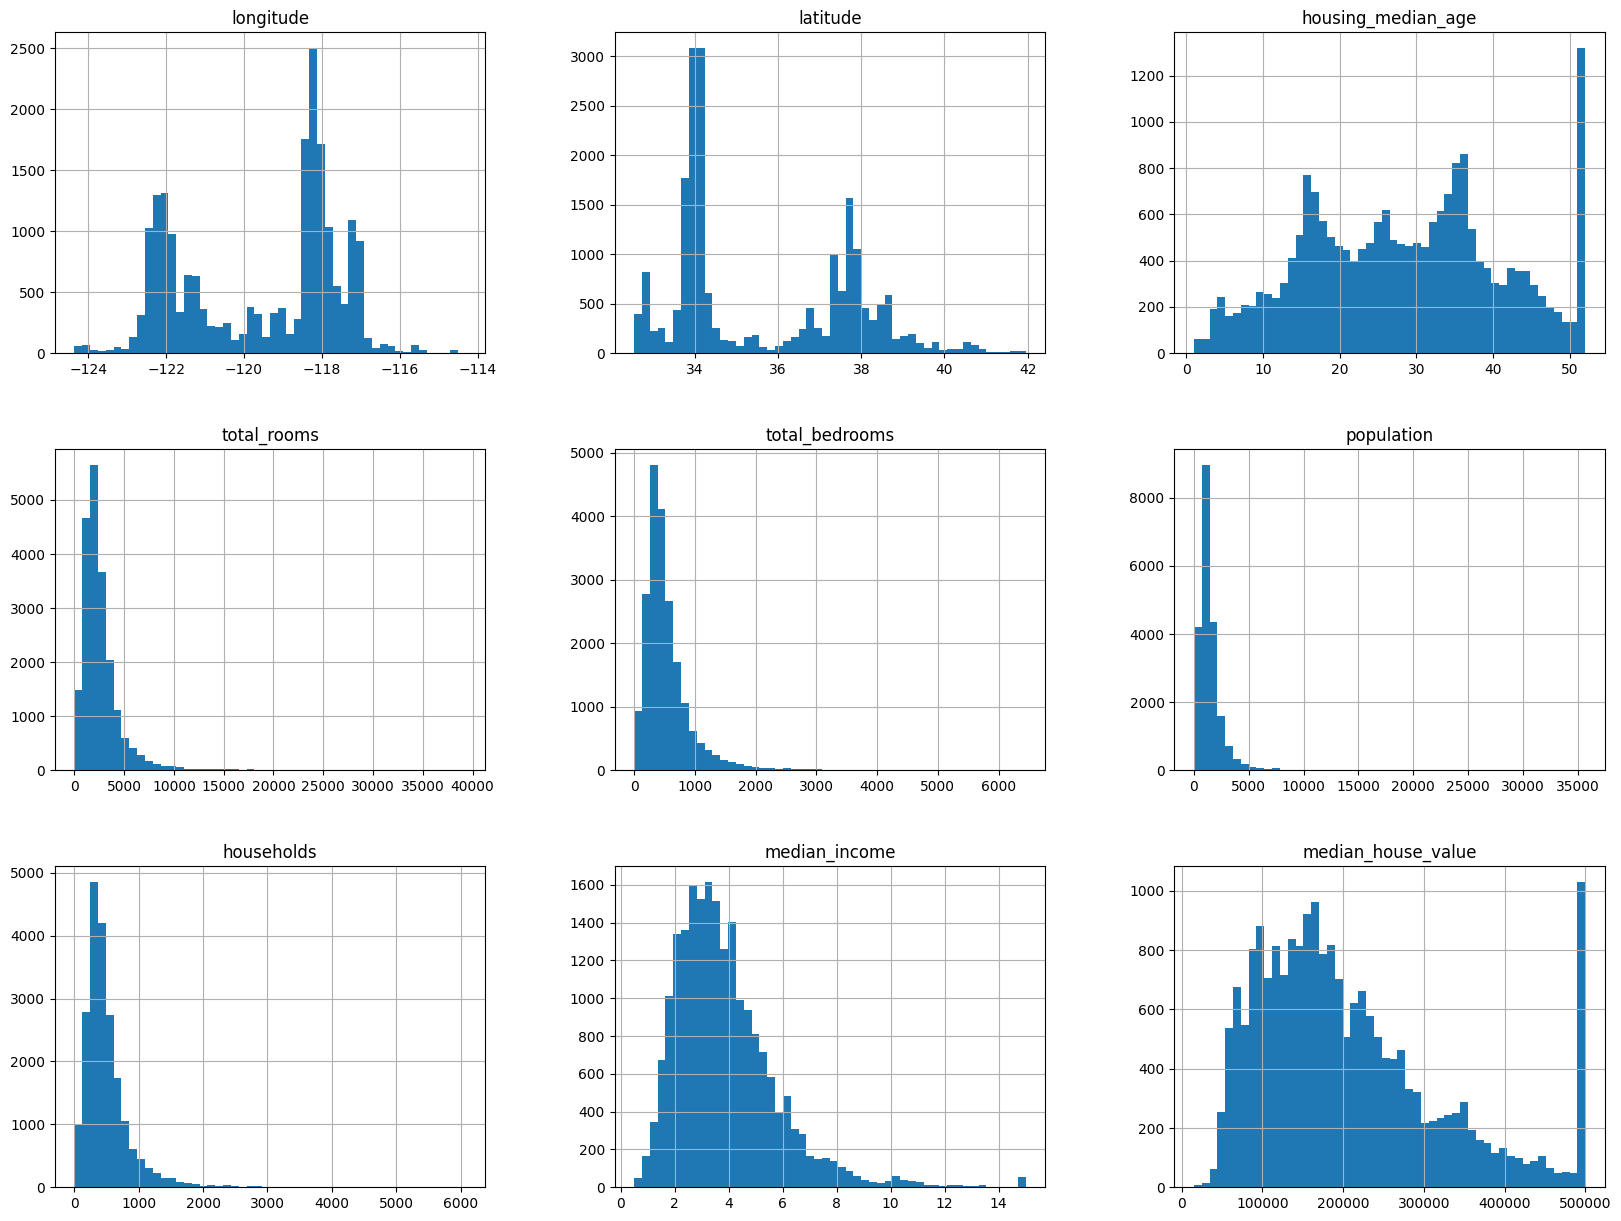

In [38]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

###    2 - Répartition des données

Q12) Créez un titre, intitulé 2- Répartition des données (il va être automatiquement inséré comme sous-section de la section I)

Q13) Utilisez le code ci-dessous pour partitionner les données en base d'apprentissage  (80% des données) et base de test (20% des données):

In [39]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Q14) Affichez les premières instances de la base de train avec la fonction "head" du module pandas

In [40]:
print(train_set.head(n=5))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEA

### 3 - Découverte et visualisation des données

Q15) Créez un titre, intitulé 3- Découverte et visualisation des données

Q16) Téléchargez la carte de la californie et déplacez-la dans le TP1 sur GoogleDrive

https://drive.google.com/file/d/1J9it-rT4bPyPRibPRk9TMATNwaLfudtl/view

Q17) Exécutez et comprenez le code suivant qui permet d'avoir une idée sur le lien entre la position géographique et le prix des maisons (valeur cible) :

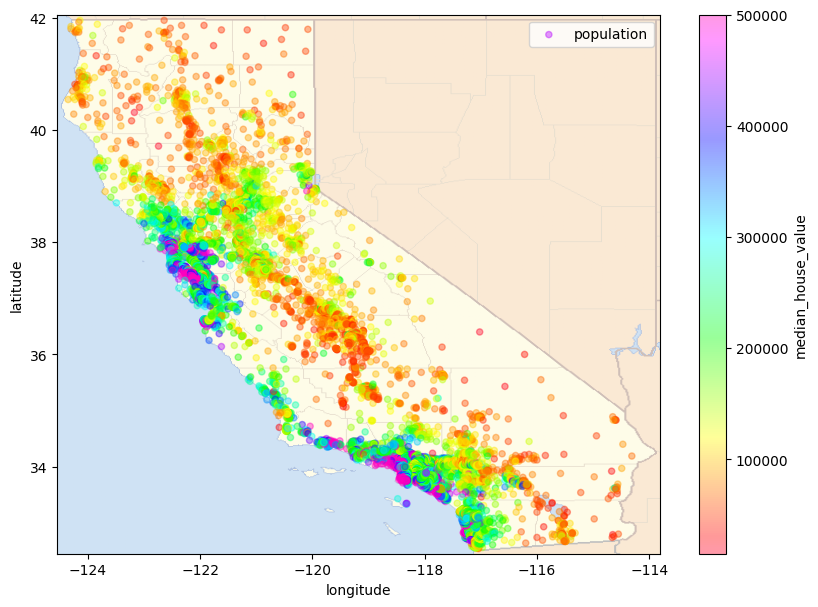

In [41]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#import des bibliothèques

california_img = mpimg.imread("/content/drive/MyDrive/tp_IA/TP1/california.png")
#récupération et lecture de l'image dans mes fichiers
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, label="population", c="median_house_value", colormap='gist_rainbow', colorbar=True, sharex=False, figsize=(10,7))
#trace le graphique
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
#montre l'image en fond
plt.legend()


Q18) Une pratique très intéressante dans l'analyse de données est l'étude des corrélations entre les variables. Vous allez utiliser la corrélation de Pearson : https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Testez le code suivant pour afficher, en valeur, la corrélation de l'attribut "median_house_value" avec les autres attributs. Pour ce faire, appliquez la fonction "corr" du module Pandas sur les données pour calculer le coefficient de corrélation de Pearson . Qu'est ce que vous remarquez ?


In [42]:
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix["median_house_value"])

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64


Seule le median_income semble avoir un effet significatif sur median_house_value

### 4 - Nettoyage des données


Avant d'intégrer les données dans un algorithme d'apprentissage automatique, il est indispensable de séparer les "features" (l'input) et la valeur cible (l'output = valeur à prédire)

Q19) Créez un titre intitulé 4- Nettoyage des données

Q20) Utilisez le code suivant pour créer deux variables :
housing_data :

a) cette variable va contenir les inputs (les features). Utilisez la fonction "drop" du module pandas pour supprimer la colonne des valeur cible (median_house_value)

In [43]:
train_data = train_set.drop("median_house_value", axis=1)
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income ocean_

b) housing_label : cette variable va contenir les valeurs cibles (median_house_value). Pour ce faire , utilisez la fonction copy du module pandas.

In [44]:
train_labels = train_set["median_house_value"].copy()
print(train_labels)

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64


Q21) Dans la question 8, vous avez dû remarquer que l'attribut "total_bedrooms" a des valeurs manquantes (NaN). Pour remédier à ceci, il existes trois options :

a) Supprimer les valeurs manquantes (NaN)

b) Supprimer l'attribut "total_bedrooms"

c) Remplacer les valeurs manquantes par une autre valeur (0, la moyenne, la médiane, …). Nous optons pour cette méthode. Écrivez un code qui remplace les valeurs manquantes par la médiane de toutes les valeurs de "total_bedrooms". Pour ce faire, utilisez les fonctions "median" et  "fillna" du module Pandas. Ajoutez l'argument " inplace=True" à la fonction "fillna". Vérifiez avec la fonction "info" si le problème a été résolu


In [45]:
housing.fillna(value=housing["total_bedrooms"].median, axis=1, inplace= True)
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   longitude           20640 non-null  object
 1   latitude            20640 non-null  object
 2   housing_median_age  20640 non-null  object
 3   total_rooms         20640 non-null  object
 4   total_bedrooms      20640 non-null  object
 5   population          20640 non-null  object
 6   households          20640 non-null  object
 7   median_income       20640 non-null  object
 8   median_house_value  20640 non-null  object
 9   ocean_proximity     20640 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB
None


Q22) Les algorithmes d'apprentissage automatique préfèrent travailler avec des données numériques. Ceci est valable pour tous les attributs sauf "ocean_proximity". Vérifiez ceci en affichant les valeurs de ce feature

In [46]:
print(housing['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


Q23) Pour transformer les valeurs textuelles en des valeurs numériques, suivez les étapes suivantes :

a) Créez un objet de la classe OrdinalEncoder de Scikit-Learn. Cette classe est à importer du sous-module preprocessing du module sklearn

b) Stockez dans une variable les valeurs de l'attribut "ocean_proximity". Utilisez plutôt la syntaxe suivante :

train_cat = train_data[["ocean_proximity"]]

c) Appliquez la méthode "fit_transform" de la classe OrdinalEncoder sur  l'objet créé. L'argument de cette méthode sera "housing_cat".

d) Affectez le résultat de la question précédente (c) aux valeurs de l'attribut "ocean_proximity"

e) Affichez les dix premières instance de la base de données pour vérifier le résultat


In [47]:
from sklearn.preprocessing import OrdinalEncoder

# a) Créer un objet de la classe OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# b) Stocker les valeurs de l'attribut "ocean_proximity"
train_cat = train_data[["ocean_proximity"]]

# c) Appliquer la méthode "fit_transform" de OrdinalEncoder sur train_cat
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)

# d) Affecter le résultat aux valeurs de l'attribut "ocean_proximity"
train_data["ocean_proximity"] = train_cat_encoded

# e) Afficher les dix premières instances de la base de données pour vérifier le résultat
print(train_data.head(10))


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
17848    -121.86     37.42                20.0       5032.0           808.0   
6252     -117.97     34.04                28.0       1686.0           417.0   
9389     -122.53     37.91                37.0       2524.0           398.0   
6113     -117.90     34.13                 5.0       1126.0           316.0   
6061     -117.79     34.02                 5.0      18690.0          2862.0   

       population  households  median_income  ocean_proximity  
14196      2300.0       623.0         3.2596              4.0  
82

#  II - Sélection et apprentissage du modèle

---



Q24) Créez un titre, avec une grande taille de police, intitulé II- Sélection et apprentissage du modèle

### 1 - Apprentissage du modèle

Q25) Créez un titre intitulé 1- Apprentissage du modèle

Q26) Créez un code permettant d'appliquer la régression linéaire sur les données d'apprentissage. Pour ce faire,

a) Créez un objet de la classe LinearRegression de Scikit-Learn. Cette classe est à importer du sous-module linear_model du module sklearn

b) Appliquez la méthode "fit" sur cet objet en donnant comme arguments les données d'apprentissages et leurs labels (valeurs cibles = classes) calculées dans la question 20


In [48]:
from sklearn.linear_model import LinearRegression

# a) Créer un objet de la classe LinearRegression
linear_reg = LinearRegression()

# b) Appliquer la méthode "fit" sur cet objet avec les données d'apprentissage et leurs labels
linear_reg.fit(train_data, train_labels)


LinearRegression()

### 2- Evaluation du modèle d'apprentissage sur les données d'apprentissage

Q27) Créez un titre intitulé 2- Evaluation du modèle d'apprentissage sur les données   d'apprentissage

Q28) Créez un code qui prédit les classes de la base d'apprentissage. Pour ce faire, utilisez la méthode predict de la classe LinearRegression en donnant comme argument les données d'apprentissage. Ensuite, affichez les labels réels et ceux prédits

rq: label = prix des maisons

In [55]:
# Prédiction des classes sur les données d'apprentissage
train_predictions = linear_reg.predict(train_data)

# Affichage des labels réels et prédits
print("Labels réels :", train_labels[:10])  # Affiche les 10 premiers labels réels
print("\n")
print("Labels prédits : ", train_predictions[:10])  # Affiche les 10 premiers labels prédits


Labels réels : 14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
6252     157300.0
9389     500001.0
6113     139800.0
6061     315600.0
Name: median_house_value, dtype: float64


Labels prédits :  [180251.26434736 285591.79669635 262660.32133103 139991.51256679
 177370.82963546 307190.93830601 142126.40405031 409952.15288087
  76701.53159668 211391.71672049]


Q29) Calculez la mesure RMSE du modèle de la régression linéaire. Pour ce faire, utilisez la fonction mean_squared_error du sous-module metrics du module Scikit-Learn. Pensez à appliquer la racine carré au résultat de la fonction avec la méthode sqrt du module numpy

In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(train_labels, train_predictions))

print("RMSE du modèle de régression linéaire :", rmse)

RMSE du modèle de régression linéaire : 69361.07142906451


In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(train_labels, train_predictions)

# Calculer la RMSE en appliquant la racine carrée à l'erreur quadratique moyenne
rmse = np.sqrt(mse)

print("RMSE du modèle de régression linéaire :", rmse)


RMSE du modèle de régression linéaire : 69361.07142906451


Q30) Pour l'apprentissage, utilisez cette fois-ci la classe DecisionTreeRegressor qui représente l'algorithme de l'arbre de décision utilisé pour la régression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Créer un objet de la classe DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Entraîner le modèle sur les données d'apprentissage
tree_reg.fit(train_data, train_labels)


DecisionTreeRegressor()

Q31) Calculez la mesure RMSE du modèle DecisionTreeRegressor qui existe dans le sous-module tree du module sklearn

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prédire les valeurs pour les données d'apprentissage
train_predictions_tree = tree_reg.predict(train_data)

# Calculer l'erreur quadratique moyenne
mse_tree = mean_squared_error(train_labels, train_predictions_tree)

# Calculer la RMSE en appliquant la racine carrée à l'erreur quadratique moyenne
rmse_tree = np.sqrt(mse_tree)

print("RMSE du modèle DecisionTreeRegressor :", rmse_tree)


RMSE du modèle DecisionTreeRegressor : 0.0


Quel est le modèle le plus performant sur la base d'apprentissage ?

Celui dont le RMSE est le plus bas est le modèle le plus performant sur la base d'apprentissage, dans notre cas c'est le modèle DecisionTreeRegressor.

### 3- Evaluation du modèle d'apprentissage sur les données de validation

Créez un titre intitulé 3- Evaluation du modèle d'apprentissage sur les données de validation

Q32) Même si la valeur de RMSE de DecisionTreeRegressor est égale à 0, on ne peut pas conclure que ce modèle fonctionne parfaitement. On doit étudier sa capacité de généralisation sur la base de validation.

Répartissez la base d'apprentissage en base d'apprentissage et en base de validation en utilisant la méthode 10-fold cross-validation.


a) Pour ce faire, utilisez la fonction cross_val_score du sous-module model_selection du module sklearn. Affectez la valeur "neg_mean_squared_error" pour l'argument "scoring". Ensuite, affichez :
Le valeur RMSE de chacun des 10 fold. Pensez à ajouter la racine et à multiplier x (-1)

b) La moyenne des RMSE de tous les folds via la fonction mean()


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# a) Validation croisée à 10 volets avec la régression par arbre de décision
scores = cross_val_score(tree_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Valeur RMSE de chaque fold de la validation croisée :")
for i, score in enumerate(tree_rmse_scores, 1):
    print(f"Fold {i}: {score}")

# b) Calcul de la moyenne des RMSE de tous les folds
mean_rmse_tree = tree_rmse_scores.mean()
print("\nMoyenne des RMSE de tous les folds :", mean_rmse_tree)


Valeur RMSE de chaque fold de la validation croisée :
Fold 1: 69991.166479426
Fold 2: 70728.0209165661
Fold 3: 69557.7470869553
Fold 4: 71673.79053451621
Fold 5: 70086.61945800699
Fold 6: 68678.15414922008
Fold 7: 69825.82433596363
Fold 8: 69041.1388499828
Fold 9: 72339.29146274884
Fold 10: 69995.79668729081

Moyenne des RMSE de tous les folds : 70191.75499606766


Q33) Appliquez les étapes de la question 32 sur le modèle de la régression linéaire. Ensuite, comparez les résultats avec ceux du DecisionTreeRegressor.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Créer un objet de la classe LinearRegression
lin_reg = LinearRegression()

# a) Validation croisée à 10 volets avec la régression linéaire
scores = cross_val_score(lin_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

print("Valeur RMSE de chaque fold de la validation croisée :")
for i, score in enumerate(lin_rmse_scores, 1):
    print(f"Fold {i}: {score}")

# b) Calcul de la moyenne des RMSE de tous les folds
mean_rmse_lin = lin_rmse_scores.mean()
print("\nMoyenne des RMSE de tous les folds :", mean_rmse_lin)


Valeur RMSE de chaque fold de la validation croisée :
Fold 1: 66187.62479241968
Fold 2: 72779.35713343952
Fold 3: 68950.17710356254
Fold 4: 67634.12212475298
Fold 5: 70452.68132170763
Fold 6: 66516.76635312343
Fold 7: 66535.02116758443
Fold 8: 71001.14354709313
Fold 9: 74319.03994135234
Fold 10: 70669.19262424899

Moyenne des RMSE de tous les folds : 69504.51261092848


Q34) Quel modèle présente le problème de sur-apprentissage ? Pourquoi ?

La différence de performance entre les données d'apprentissage et de validation est plus prononcée pour l'arbre de décision que pour la régression linéaire, cela indique que l'arbre de décision présente probablement un sur-apprentissage, bien qu'il reste plus précis et fiable dans nos tests.

# III - Fine-tuning

Créez un titre intitulé III- Fine-tuning


###  1 - Grid Search

Dans cette partie, vous allez chercher les meilleurs paramètres d'une autre méthode de régression à savoir les forêts aléatoires en utilisant la classe RandomForestRegressor

Q35) Créez un titre intitulé 1- Grid Search

Q36) Ecrire un code qui :

a) Crée un objet de la classe RandomForestRegressor. Cette classe existe dans le sous-module ensemble du module sklearn


In [79]:
from sklearn.ensemble import RandomForestRegressor

# Créer un objet de la classe RandomForestRegressor
forest_reg = RandomForestRegressor()


b) Crée la variable suivante :

Cette variable contient un dictionnaire avec quelques valeurs de deux paramètres de la méthode RandomForestRegressor. Au total, 4x3=12 combinaisons vont être testées

In [81]:
param_grid = [{
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8]
}]

print(param_grid)


[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}]


c) Applique une recherche, de type GridSearch, pour trouver le couple qui donne le meilleur résultat. Pour ce faire :

i) créez un objet de la classe GridSearchCV du sous-module model_selection du module sklearn. Le constructeur de cette classe doit avoir :

1) l'objet de la question 36a

2) une valeur de 5 pour "cv" (une validation croisée de type 5-fold cross-validation)

3) une valeur de "scoring" de "neg_mean_squared_error"


In [85]:
from sklearn.model_selection import GridSearchCV

# Créer un objet de la classe GridSearchCV
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")

ii) appliquez la méthode "fit" sur l'objet créé dans la question 36.c.i tout en donnant comme argument la base d'apprentissage et ses labels

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Créer un objet de la classe RandomForestRegressor
forest_reg = RandomForestRegressor()

# Créer un objet de la classe GridSearchCV
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', refit = True)


In [87]:
# Appliquer la méthode "fit" sur l'objet GridSearchCV
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

Q37) Affichez les meilleurs paramètres obtenus par la méthode GridSearch en utilisant l'attribut "best_params_" de l'objet créé dans la question 36.c.i.

In [88]:
# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)


Meilleurs paramètres: {'max_features': 4, 'n_estimators': 30}


Q38) Affichez les résultats des 12 combinaisons avec le code suivant :

Avec grid-search est l'objet créé dans la question 36.c.i

In [89]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092093,0.005411,0.006374,0.000358,2,3,"{'max_features': 2, 'n_estimators': 3}",-3.744110e+09,-3.919359e+09,-4.058515e+09,-3.805795e+09,-4.437037e+09,-3.992963e+09,2.465263e+08,12
1,0.296251,0.008146,0.014024,0.000388,2,10,"{'max_features': 2, 'n_estimators': 10}",-2.776007e+09,-2.905264e+09,-2.818304e+09,-2.813211e+09,-2.950267e+09,-2.852611e+09,6.466283e+07,8
2,0.863150,0.042162,0.038764,0.003144,2,30,"{'max_features': 2, 'n_estimators': 30}",-2.565626e+09,-2.590895e+09,-2.636380e+09,-2.546688e+09,-2.713937e+09,-2.610705e+09,5.973088e+07,4
3,0.215702,0.004112,0.007684,0.000418,4,3,"{'max_features': 4, 'n_estimators': 3}",-3.521311e+09,-3.526852e+09,-3.635856e+09,-3.229649e+09,-3.641051e+09,-3.510944e+09,1.496785e+08,11
4,0.617944,0.110193,0.015892,0.001504,4,10,"{'max_features': 4, 'n_estimators': 10}",-2.646073e+09,-2.640008e+09,-2.783180e+09,-2.632594e+09,-2.596618e+09,-2.659695e+09,6.408543e+07,5
5,1.580576,0.256065,0.037690,0.001558,4,30,"{'max_features': 4, 'n_estimators': 30}",-2.483989e+09,-2.446771e+09,-2.375862e+09,-2.382971e+09,-2.533791e+09,-2.444677e+09,6.005716e+07,1
6,0.416789,0.189459,0.010400,0.004804,6,3,"{'max_features': 6, 'n_estimators': 3}",-3.668771e+09,-3.231520e+09,-3.069898e+09,-3.306679e+09,-3.464014e+09,-3.348176e+09,2.044352e+08,9
7,0.838038,0.135074,0.016527,0.002272,6,10,"{'max_features': 6, 'n_estimators': 10}",-2.618201e+09,-2.706319e+09,-2.654248e+09,-2.573286e+09,-2.778271e+09,-2.666065e+09,7.106176e+07,6
8,2.186172,0.347741,0.038726,0.003113,6,30,"{'max_features': 6, 'n_estimators': 30}",-2.511757e+09,-2.495469e+09,-2.388482e+09,-2.376544e+09,-2.560959e+09,-2.466642e+09,7.209553e+07,2
9,0.319862,0.055184,0.006898,0.001140,8,3,"{'max_features': 8, 'n_estimators': 3}",-3.435044e+09,-3.362384e+09,-3.340260e+09,-3.136735e+09,-3.548504e+09,-3.364585e+09,1.351315e+08,10


### 2 - Evaluation du modèle d'apprentissage sur les données de test

Q39) Créez un titre intitulé 2- Evaluation du modèle d'apprentissage sur les données de test

40) Testez votre modèle d'apprentissage sur la base de test. Pour ce faire, pensez à :

a) Récupérer les données de test et ses labels

b) Remplacer les valeurs NaN de l'attribut "total_bedrooms" de la base de test par la médiane

c) Transformer les valeurs textuelles de "ocean_proximity" en valeurs numériques

d) Stocker le modèle d'apprentissage dans une variable en utilisant l'attribut best_estimator_ sur l'objet créé dans la question 36.c.i

e) Calculer la valeur RMSE du modèle sur la base de test


In [90]:
# Récupérer les données de test et ses labels
test_data = test_set.drop("median_house_value", axis=1)
test_labels = test_set["median_house_value"].copy()

# Remplacer les valeurs NaN de l'attribut "total_bedrooms" de la base de test par la médiane
test_data["total_bedrooms"].fillna(test_data["total_bedrooms"].median(), inplace=True)

# Transformer les valeurs textuelles de "ocean_proximity" en valeurs numériques
test_cat = test_data[["ocean_proximity"]]
test_cat_encoded = ordinal_encoder.transform(test_cat)
test_data["ocean_proximity"] = test_cat_encoded

# Stocker le modèle d'apprentissage dans une variable en utilisant l'attribut best_estimator_
best_model = grid_search.best_estimator_

# Calculer la valeur RMSE du modèle sur la base de test
from sklearn.metrics import mean_squared_error
import numpy as np

# Prédire les valeurs sur la base de test
test_predictions = best_model.predict(test_data)

# Calculer l'erreur quadratique moyenne (RMSE)
test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
print("RMSE sur la base de test:", test_rmse)


RMSE sur la base de test: 50060.65710076246
